In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import csv

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
FILE_PATH="/content/drive/MyDrive/Colab Notebooks"

In [4]:
os.chdir(FILE_PATH)

In [5]:
!apt -qq -y install fonts-nanum > /dev/null
fontpath='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family="NanumBarunGothic")

In [6]:
data_file = pd.read_csv("전국통합식품영양성분정보표준데이터.csv", delimiter=',', header=0, encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data_file.head()

,식품코드,식품명,데이터구분코드,데이터구분명,에너지(kcal),수분(g),단백질(g),지질(g),회분(g),탄수화물(g),...,출처코드,출처명,1회섭취참고량,업체명,데이터생성방법코드,데이터생성방법명,데이터생성일자,데이터기준일자,제공기관코드,제공기관명
0,P101-016000200-0489,사탕_슈퍼마일리지ABC39900,P,가공식품,360,NaN,0.00,0.00,NaN,90.00,...,3,식품의약품안전처,10.0,농업회사법인주식회사내츄럴엔,2,수집,2021-06-30,2022-08-11,1471000,식품의약품안전처
1,P101-016000200-0490,사탕_슈퍼마일리지아르기닌39900,P,가공식품,370,NaN,80.00,0.00,NaN,10.00,...,3,식품의약품안전처,10.0,농업회사법인주식회사내츄럴엔,2,수집,2021-06-30,2022-08-11,1471000,식품의약품안전처
2,P101-016000200-0491,사탕_슈퍼마일리지타트체리46080,P,가공식품,360,NaN,0.00,0.00,NaN,90.00,...,3,식품의약품안전처,10.0,농업회사법인주식회사내츄럴엔,2,수집,2021-06-30,2022-08-11,1471000,식품의약품안전처
3,P101-016000200-0492,사탕_스마일캔디,P,가공식품,357,NaN,0.00,1.00,NaN,87.00,...,3,식품의약품안전처,10.0,OAK LEAF CONFECTIONS CO,2,수집,2020-06-30,2022-08-11,1471000,식품의약품안전처
4,P101-016000200-0493,사탕_스미야키커피캔디,P,가공식품,395,NaN,1.05,2.11,NaN,92.63,...,3,식품의약품안전처,10.0,"KASUGAI SEIKA CO., LTD. KASUGAI FACTORY",2,수집,2021-06-30,2022-08-11,1471000,식품의약품안전처


In [8]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   식품코드           43941 non-null  object 
 1   식품명            46186 non-null  object 
 2   데이터구분코드        46186 non-null  object 
 3   데이터구분명         46186 non-null  object 
 4   에너지(kcal)      46186 non-null  int64  
 5   수분(g)          3819 non-null   float64
 6   단백질(g)         46186 non-null  float64
 7   지질(g)          46186 non-null  float64
 8   회분(g)          3368 non-null   float64
 9   탄수화물(g)        46186 non-null  float64
 10  당류(g)          45521 non-null  float64
 11  총식이섬유(g)       2880 non-null   float64
 12  칼슘(mg)         3321 non-null   float64
 13  철(mg)          3343 non-null   float64
 14  인(mg)          3353 non-null   float64
 15  칼륨(mg)         2866 non-null   float64
 16  나트륨(mg)        45672 non-null  float64
 17  비타민 A(μg RAE)  2893 non-null   float64
 18  레티놀(μg

In [9]:
data_file.describe()

,에너지(kcal),수분(g),단백질(g),지질(g),회분(g),탄수화물(g),당류(g),총식이섬유(g),칼슘(mg),철(mg),...,니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),총포화지방산(g),트랜스지방산(g),폐기율(%),출처코드,데이터생성방법코드,제공기관코드
count,46186.000000,3819.000000,46186.000000,46186.000000,3368.000000,46186.000000,45521.000000,2880.000000,3321.000000,3343.000000,...,3185.000000,3221.000000,2053.000000,44797.000000,45269.000000,45131.000000,1577.000000,46186.000000,46186.000000,4.618600e+04
mean,253.269930,55.610390,5.608465,10.556468,2.198192,34.053354,14.452875,3.205729,84.760614,2.276407,...,1.950135,8.443744,0.638466,16.091682,4.104692,0.053533,5.600507,2.896527,1.935067,1.465232e+06
std,189.755963,34.144479,5.981553,16.776115,6.109386,26.625592,18.297353,6.446090,215.249452,5.077282,...,3.259379,28.301165,14.554665,38.892128,6.346833,0.221915,12.437211,0.432232,0.247025,3.083095e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.192266e+06
25%,86.000000,13.400000,1.360000,0.500000,0.740000,11.330000,1.800000,0.000000,10.000000,0.310000,...,0.221000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.471000e+06
50%,210.000000,68.500000,5.000000,3.870000,1.170000,26.690000,7.270000,1.600000,24.000000,0.870000,...,0.830000,0.890000,0.000000,0.330000,1.000000,0.000000,0.000000,3.000000,2.000000,1.471000e+06
75%,389.000000,84.000000,7.690000,14.550000,1.782500,55.000000,20.000000,3.500000,66.000000,2.325000,...,2.580000,4.210000,0.000000,16.440000,5.630000,0.000000,1.000000,3.000000,2.000000,1.471000e+06
max,1000.000000,99.900000,100.000000,108.000000,99.780000,192.000000,180.000000,79.900000,4068.000000,109.000000,...,51.400000,800.000000,644.730000,3100.000000,120.000000,8.600000,79.000000,3.000000,3.000000,1.471000e+06


In [10]:
info = data_file.describe()
print(info.loc['count', :].min(), info.loc['count', :].max())

1577.0 46186.0


In [11]:
data_file.columns

Index(['식품코드', '식품명', '데이터구분코드', '데이터구분명', '에너지(kcal)', '수분(g)', '단백질(g)',
       '지질(g)', '회분(g)', '탄수화물(g)', '당류(g)', '총식이섬유(g)', '칼슘(mg)', '철(mg)',
       '인(mg)', '칼륨(mg)', '나트륨(mg)', '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)',
       '티아민(mg)', '리보플라빈(mg)', '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)',
       '콜레스테롤(mg)', '총포화지방산(g)', '트랜스지방산(g)', '폐기율(%)', '출처코드', '출처명',
       '1회섭취참고량', '업체명', '데이터생성방법코드', '데이터생성방법명', '데이터생성일자', '데이터기준일자',
       '제공기관코드', '제공기관명'],
      dtype='object')

In [12]:
len(data_file.columns)

39

In [13]:
data_file.count()

식품코드             43941
식품명              46186
데이터구분코드          46186
데이터구분명           46186
에너지(kcal)        46186
수분(g)             3819
단백질(g)           46186
지질(g)            46186
회분(g)             3368
탄수화물(g)          46186
당류(g)            45521
총식이섬유(g)          2880
칼슘(mg)            3321
철(mg)             3343
인(mg)             3353
칼륨(mg)            2866
나트륨(mg)          45672
비타민 A(μg RAE)     2893
레티놀(μg)           3239
베타카로틴(μg)         2793
티아민(mg)           3245
리보플라빈(mg)         3252
니아신(mg)           3185
비타민 C(mg)         3221
비타민 D(μg)         2053
콜레스테롤(mg)        44797
총포화지방산(g)        45269
트랜스지방산(g)        45131
폐기율(%)            1577
출처코드             46186
출처명              46186
1회섭취참고량          28565
업체명              45389
데이터생성방법코드        46186
데이터생성방법명         46186
데이터생성일자          46186
데이터기준일자          46186
제공기관코드           46186
제공기관명            46186
dtype: int64

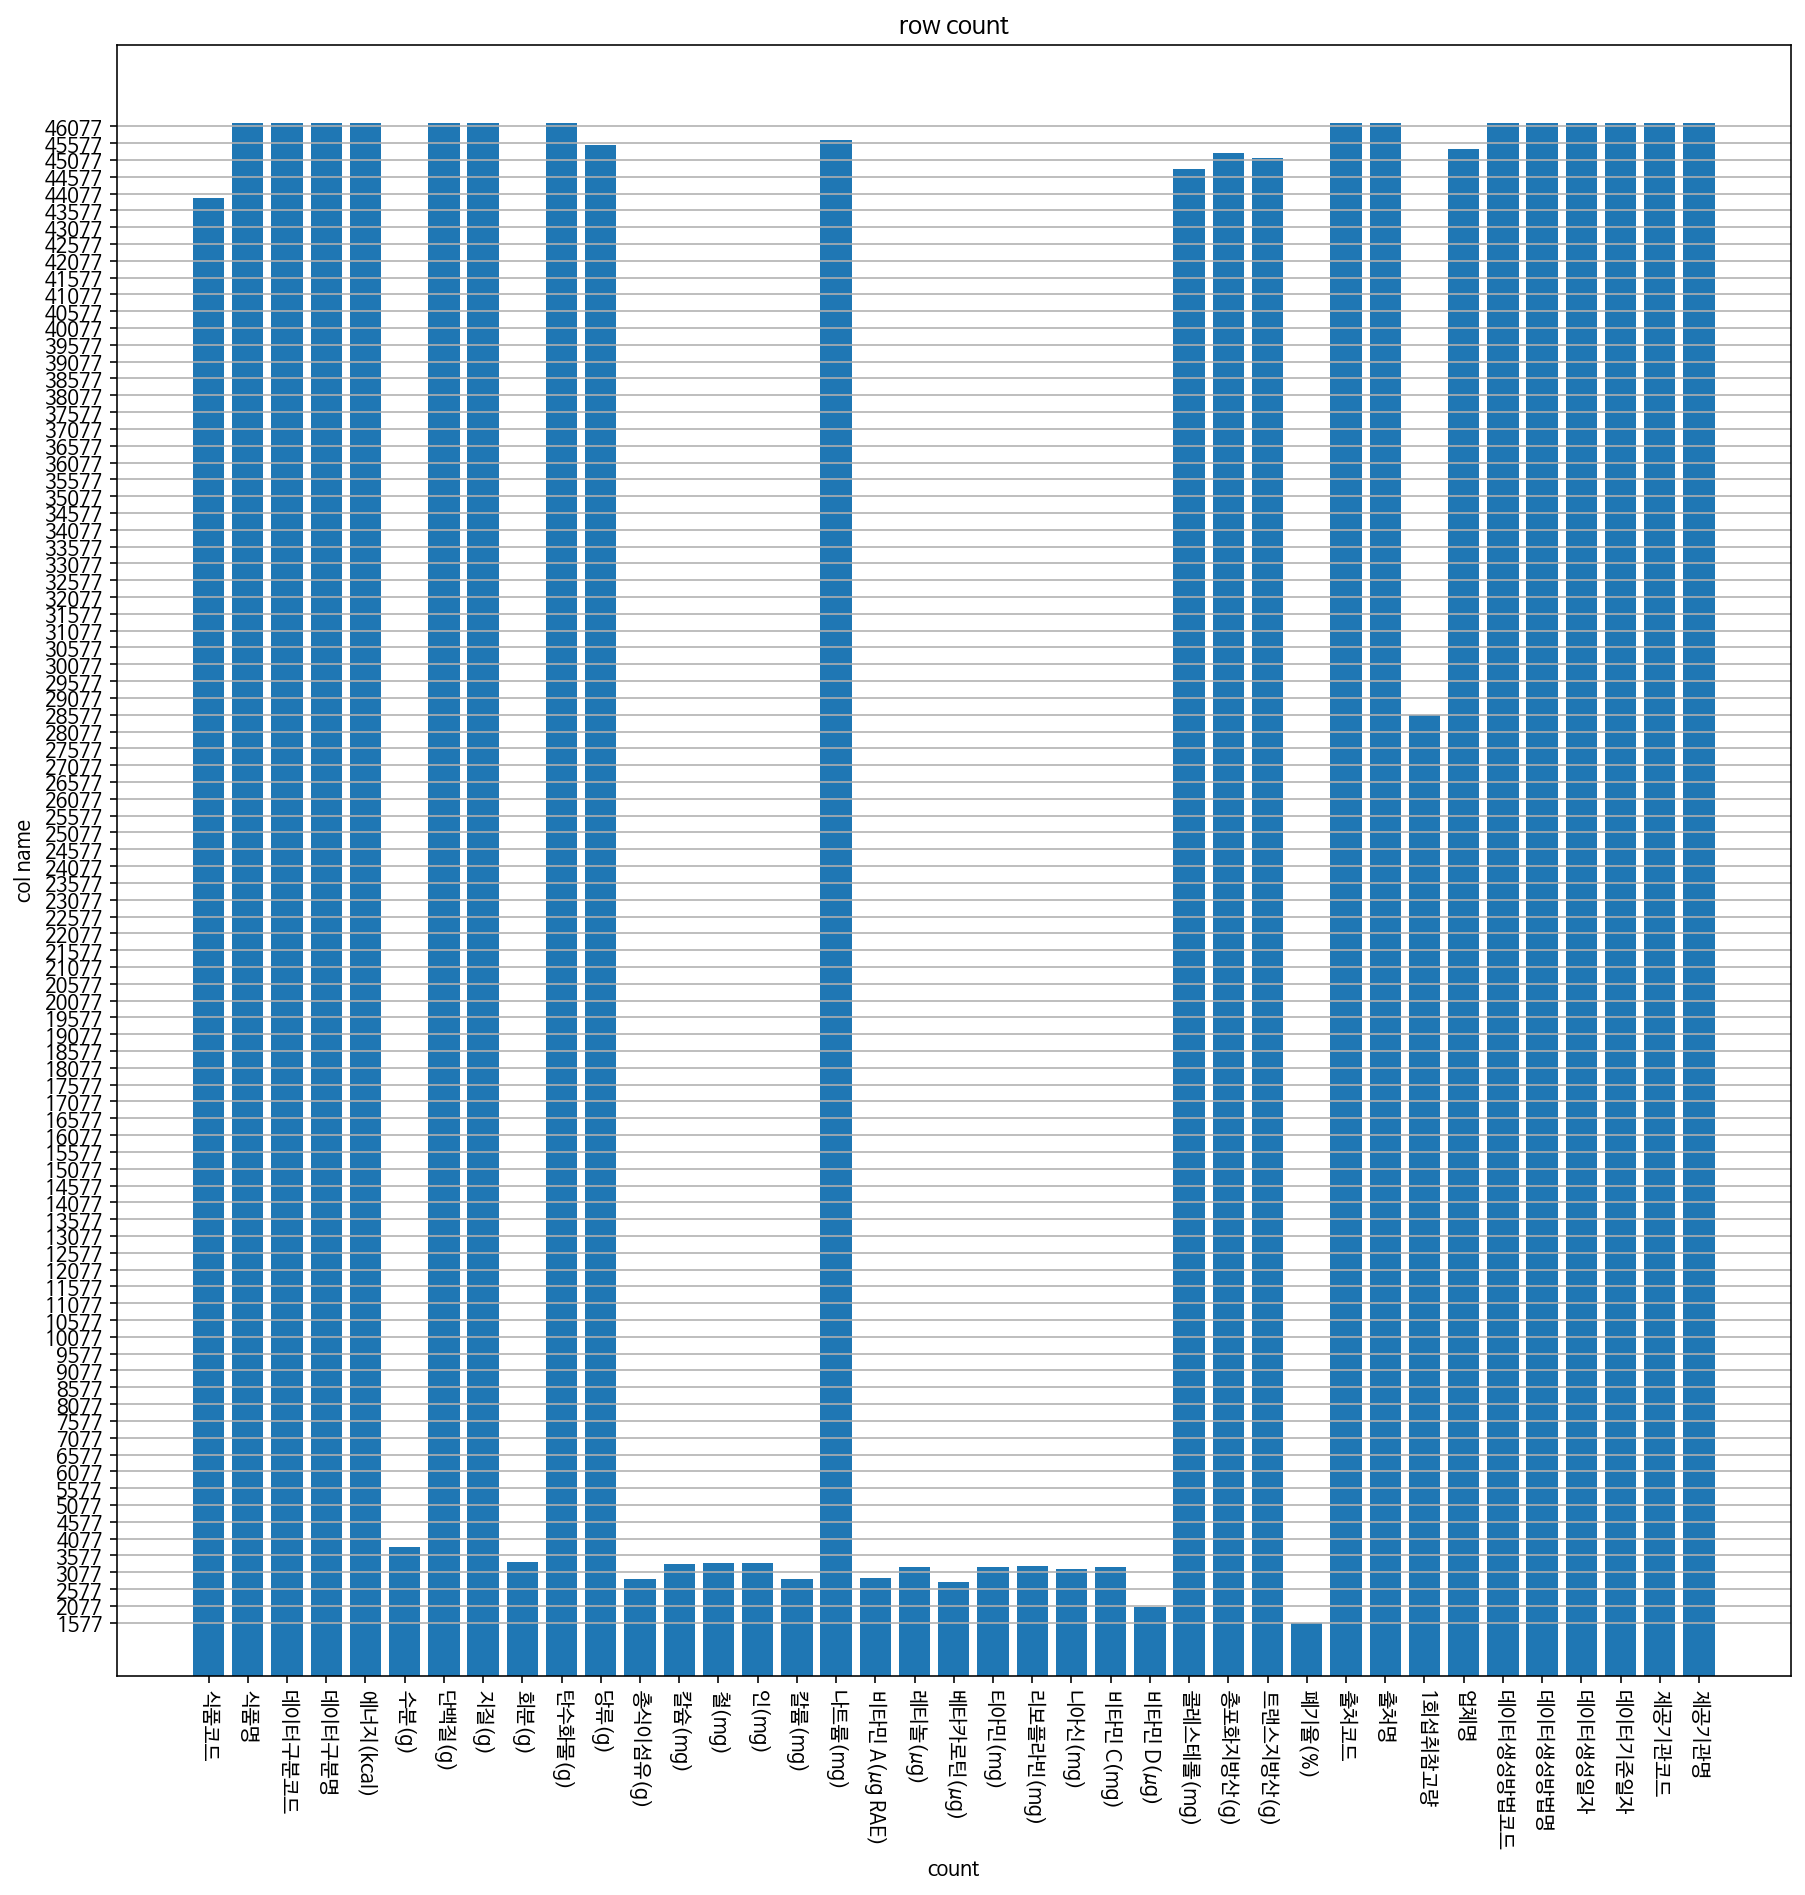

In [14]:
plt.figure(figsize=(15, 15))
plt.title("row count")
plt.bar(np.arange(len(data_file.columns)), data_file.count())
plt.xlabel("count")
plt.ylabel("col name")
major_yticks=[i for i in range(data_file.count().min(), data_file.count().max(), 500)]
plt.yticks(major_yticks)
plt.xticks(np.arange(len(data_file.columns)), data_file.columns, rotation=270)
plt.grid(True, axis='y')
plt.savefig("전국통합식품데이터_row_count.png")
plt.show()

In [15]:
data_file['식품명']

0         사탕_슈퍼마일리지ABC39900
1        사탕_슈퍼마일리지아르기닌39900
2        사탕_슈퍼마일리지타트체리46080
3                  사탕_스마일캔디
4               사탕_스미야키커피캔디
                ...        
46181          기장_찰기장_도정_생것
46182      기장_찰기장+이백찰_도정_생것
46183      기장_찰기장+한라찰_도정_생것
46184      기장_찰기장+황실찰_도정_생것
46185              메밀_도정_생것
Name: 식품명, Length: 46186, dtype: object

In [16]:
classes=[]
class_num = dict()
names=dict()

for name in data_file['식품명']:
    tokens = name.split('_')
    if len(tokens) > 1:
        category = tokens[0]
        name = tokens[1]
    else:
        name = tokens[0]

    if category not in classes:
        classes.append(category)
        class_num[category] = 1
    else:
        class_num[category] += 1
    
    names[name] = category

In [17]:
sorted_class_num = sorted(class_num.items(), key = lambda item: item[1], reverse=True)
with open("전국통합식품데이터_class_num.csv", 'w', newline='') as f:
    fieldnames = ['category', 'count']
    w = csv.DictWriter(f, fieldnames=fieldnames)
    w.writeheader()
    for category, cnt in sorted_class_num:
        w.writerow({'category': category, 'count': cnt})

In [18]:
with open("전국통합식품데이터_name_to_category.csv", 'w', newline='') as f:
    fieldnames = ['name', 'category']
    w = csv.DictWriter(f, fieldnames=fieldnames)
    w.writeheader()
    for name, category in names.items():
        w.writerow({'name': name, 'category': category})

In [21]:
data_file_without_nan = data_file.fillna(0)

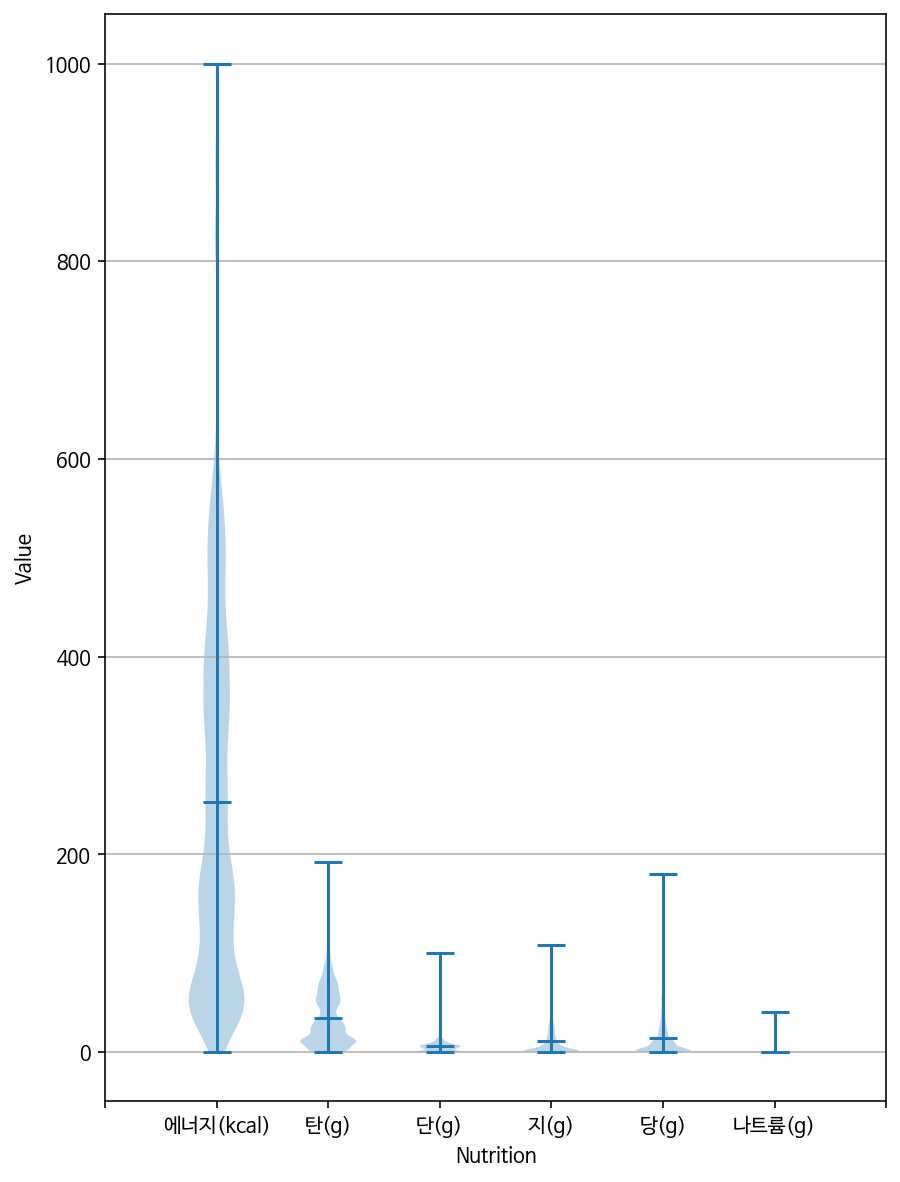

In [32]:
plt.figure(figsize=(7, 10))
plt.violinplot([data_file_without_nan['에너지(kcal)'], data_file_without_nan['탄수화물(g)'], data_file_without_nan['단백질(g)'], data_file_without_nan['지질(g)'], data_file_without_nan['당류(g)'], data_file_without_nan['나트륨(mg)']/1000], positions=[1, 2, 3, 4, 5, 6], showmeans=True) 
tickvalues = range(0, 8)
plt.xticks(ticks= tickvalues,labels=['', '에너지(kcal)', '탄(g)', '단(g)', '지(g)', '당(g)', '나트륨(g)'])
plt.xlabel("Nutrition")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.savefig("전국통합식품데이터_nutrition_range_total.png")
plt.show()

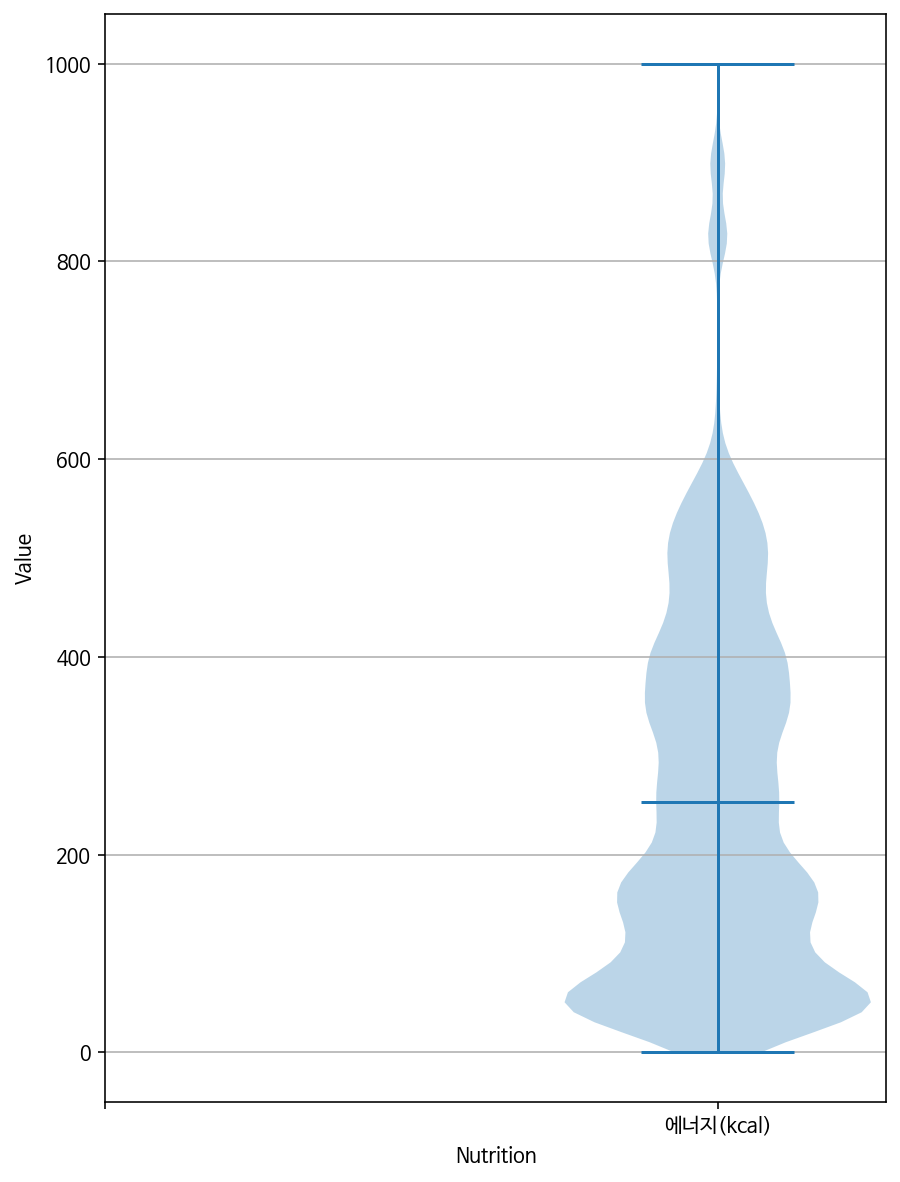

In [33]:
plt.figure(figsize=(7, 10))
plt.violinplot([data_file_without_nan['에너지(kcal)']], positions=[1], showmeans=True) 
tickvalues = range(0, 2)
plt.xticks(ticks= tickvalues,labels=["", '에너지(kcal)'])
plt.xlabel("Nutrition")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.savefig("전국통합식품데이터_nutrition_range_energy.png")
plt.show()

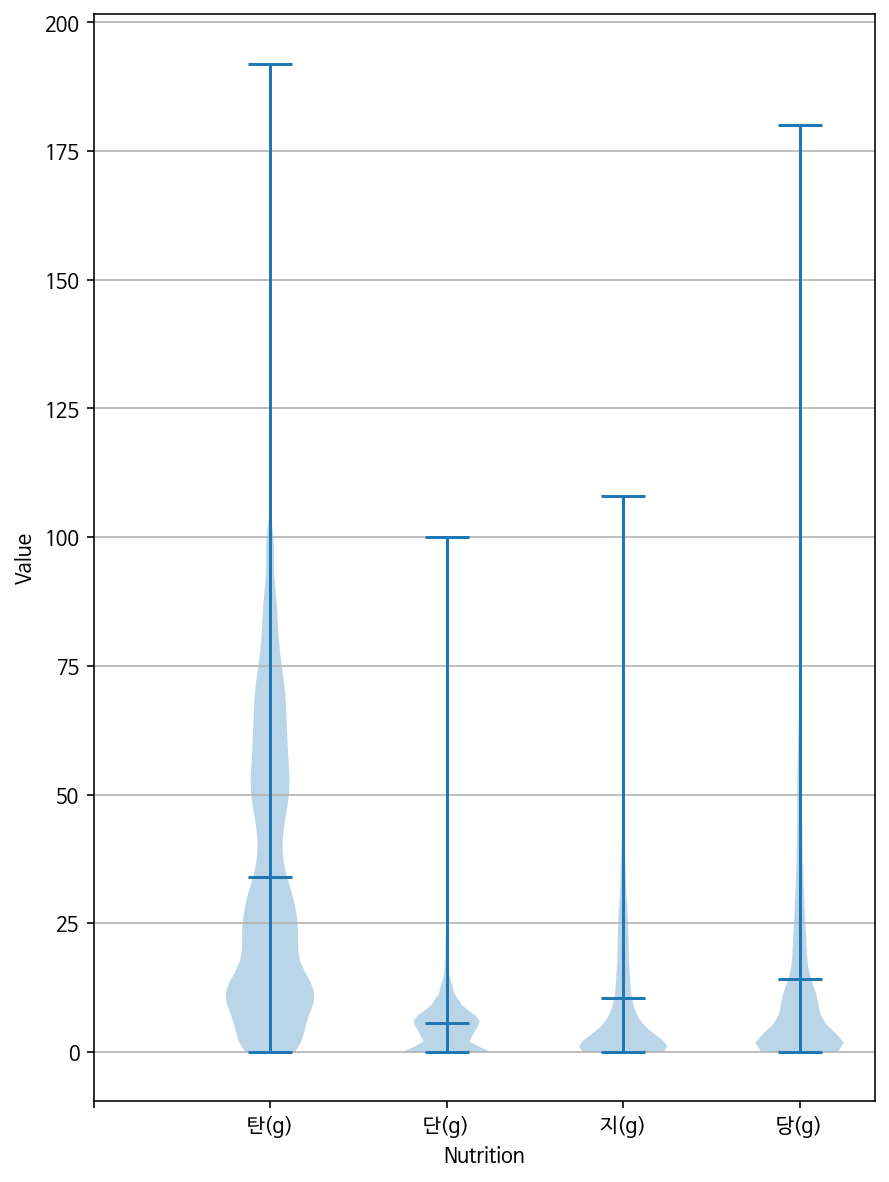

In [34]:
plt.figure(figsize=(7, 10))
plt.violinplot([data_file_without_nan['탄수화물(g)'], data_file_without_nan['단백질(g)'], data_file_without_nan['지질(g)'], data_file_without_nan['당류(g)']], positions=[1, 2, 3, 4], showmeans=True) 
tickvalues = range(0, 5)
plt.xticks(ticks= tickvalues,labels=["", '탄(g)', '단(g)', '지(g)', '당(g)'])
plt.xlabel("Nutrition")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.savefig("전국통합식품데이터_nutrition_range_탄단지당.png")
plt.show()

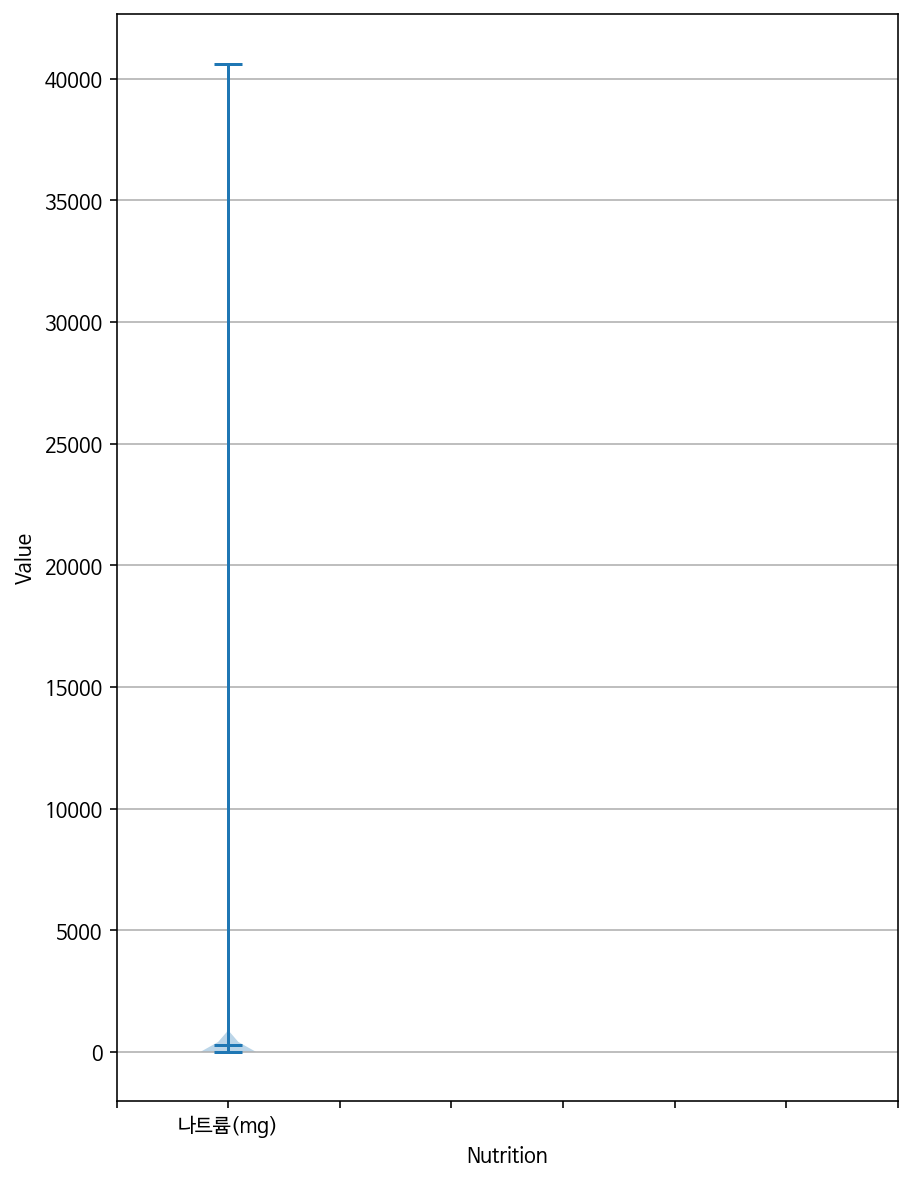

In [35]:
plt.figure(figsize=(7, 10))
plt.violinplot([data_file_without_nan['나트륨(mg)']], positions=[1], showmeans=True) 
tickvalues = range(0, 8)
plt.xticks(ticks= tickvalues,labels=['', '나트륨(mg)'])
plt.xlabel("Nutrition")
plt.ylabel('Value')
plt.grid(True, axis='y')
plt.savefig("전국통합식품데이터_nutrition_range_나트륨.png")
plt.show()